In [1]:
import sys
if 'brainmontage' not in sys.modules:
  !pip install git+https://github.com/kjamison/brainmontageplot.git

import numpy as np
from brainmontage import create_montage_figure, save_image
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors

  Cloning https://github.com/kjamison/brainmontageplot.git to /tmp/pip-req-build-dqcty1y1
  Running command git clone --filter=blob:none --quiet https://github.com/kjamison/brainmontageplot.git /tmp/pip-req-build-dqcty1y1
  Resolved https://github.com/kjamison/brainmontageplot.git to commit 3a68738a68176a645eb7cb160a7d7bace33b96a5
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 100.7 MB/s eta 0:00:00
  Created wheel for brainmontage: filename=brainmontage-1.4.2-py3-none-any.whl size=74846837 sha256=a0b9250f095d41ce9bf7a5d4ec540b5dd7fea15050375bef456564338637d65d
  Stored in directory: /tmp/pip-ephem-wheel-cache-xxb741u_/wheels/15/a9/28/03ac300ce425f7c037383e109ccec20bb1266d0f2a34174898
Successfully built brainmontage


Importamos nuestros datos, tenemos 3 clústeres diferentes

In [3]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("df_union_DX_bl.csv")

# Mostrar las primeras filas
df

,feature,0,id,Cluster
0,ST101SV,101,14,2
1,ST102CV,102,68,2
2,ST102SA,102,68,1
3,ST102TA,102,68,2
4,ST103CV,103,67,2
...,...,...,...,...
217,ST98SA,98,65,1
218,ST98TA,98,65,2
219,ST99CV,99,66,2
220,ST99SA,99,66,1


In [4]:
df_mode = df.groupby("id")["Cluster"].agg(lambda x: x.mode().iloc[0]).reset_index()
#En total nos quedamos con 86 partes del cerebro

# Crear un diccionario con los valores de cada id
roi_dict = dict(zip(df_mode["id"], df_mode["Cluster"]))

#Calculamos la longitud del df de valores únicos
num_rois = df["id"].nunique()

# Crear el array roivals con los valores asignados a cada ROI
roivals = np.array([roi_dict.get(i, 0) for i in range(1, num_rois + 1)])

# Ver los resultados
print(roivals)


[2 2 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1
 2 2 1 1 2 2 2 2 1 2 2 1]


In [5]:
# Obtener la primera ocurrencia de la columna "0" por cada "id"
df_zero = df.groupby("id")["0"].first().reset_index()

# Unir ambos resultados por "id"
df_resultado = pd.merge(df_mode, df_zero, on="id")

# Mostrar el DataFrame final
df_resultado

df_filtrado = df_resultado[df_resultado["Cluster"] == 2]
df_filtrado

,id,Cluster,0
0,1,2,17
1,2,2,61
4,5,2,42
5,6,2,29
6,7,2,12
...,...,...,...
79,80,2,116
80,81,2,117
81,82,2,118
83,84,2,119


In [6]:
df_ordenado = df_filtrado.sort_values(by="0", ascending=True)

# Convertir la columna "0" en una cadena separada por comas y un espacio
columna_0_ordenada = ", ".join(df_ordenado["0"].astype(str))

columna_0_ordenada

'11, 12, 15, 17, 23, 24, 25, 26, 29, 32, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 55, 56, 57, 58, 60, 61, 62, 65, 70, 71, 76, 82, 83, 85, 88, 91, 93, 94, 95, 97, 98, 99, 101, 102, 103, 105, 110, 111, 115, 116, 117, 118, 119, 120, 121, 124, 129'

[fetch_surf_fsaverage] Added README.md to /usr/local/lib/python3.11/dist-packages/brainmontage/nilearn_data

[fetch_surf_fsaverage] Dataset created in 
/usr/local/lib/python3.11/dist-packages/brainmontage/nilearn_data/fsaverage

[fetch_surf_fsaverage] Downloading data from https://osf.io/svf8k/download ...

[fetch_surf_fsaverage] Downloaded 2129920 of 34242788 bytes (6.2%%,   15.7s remaining)

[fetch_surf_fsaverage] Downloaded 4726784 of 34242788 bytes (13.8%%,   12.7s remaining)

[fetch_surf_fsaverage] Downloaded 7249920 of 34242788 bytes (21.2%%,   11.3s remaining)

[fetch_surf_fsaverage] Downloaded 9183232 of 34242788 bytes (26.8%%,   11.4s remaining)

[fetch_surf_fsaverage] Downloaded 11026432 of 34242788 bytes (32.2%%,   10.9s remaining)

[fetch_surf_fsaverage] Downloaded 13631488 of 34242788 bytes (39.8%%,    9.4s remaining)

[fetch_surf_fsaverage] Downloaded 15728640 of 34242788 bytes (45.9%%,    8.5s remaining)

[fetch_surf_fsaverage] Downloaded 18489344 of 34242788 bytes (54.0%%,    7.0s remaining)

[fetch_surf_fsaverage] Downloaded 21217280 of 34242788 bytes (62.0%%,    5.7s remaining)

[fetch_surf_fsaverage] Downloaded 23576576 of 34242788 bytes (68.9%%,    4.7s remaining)

[fetch_surf_fsaverage] Downloaded 26181632 of 34242788 bytes (76.5%%,    3.5s remaining)

[fetch_surf_fsaverage] Downloaded 28016640 of 34242788 bytes (81.8%%,    2.7s remaining)

[fetch_surf_fsaverage] Downloaded 30547968 of 34242788 bytes (89.2%%,    1.6s remaining)

[fetch_surf_fsaverage] Downloaded 32718848 of 34242788 bytes (95.5%%,    0.7s remaining)

[fetch_surf_fsaverage]  ...done. (19 seconds, 0 min)

[fetch_surf_fsaverage] Extracting data from 
/usr/local/lib/python3.11/dist-packages/brainmontage/nilearn_data/fsaverage/735bf0f211246c83396b5f21f706c224/downlo
ad...

[fetch_surf_fsaverage] .. done.

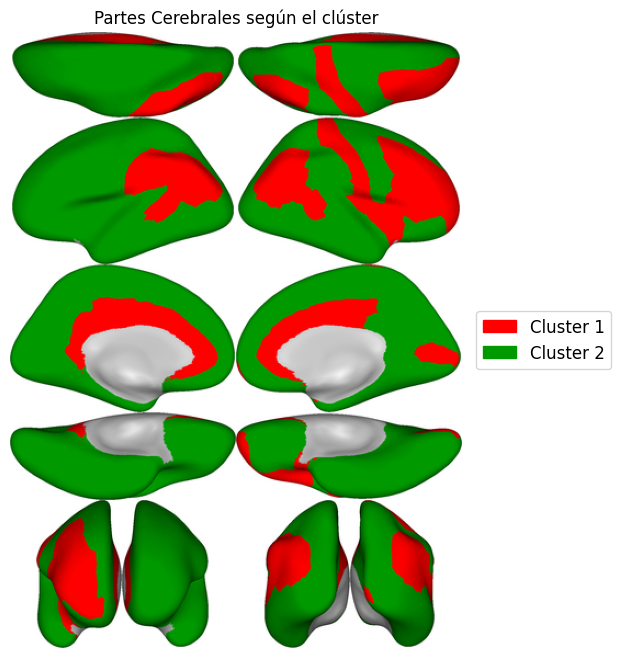

In [7]:
# Obtener IDs únicos de clúster
cluster_ids = sorted(df_mode["Cluster"].unique())

# Asignar colores fijos
color_map_dict = {
    1: (1.0, 0.0, 0.0),  # Rojo
    2: (0.0, 0.6, 0.0),  # Verde
    3: (0.0, 0.0, 1.0)   # Azul
}

# Lista de colores por orden de aparición en cluster_ids
colors = [color_map_dict.get(c, (0.5, 0.5, 0.5)) for c in cluster_ids]
colormap = mcolors.ListedColormap(colors)

# Crear la imagen con la nueva paleta
img = create_montage_figure(roivals, atlasname='fs86',
                            viewnames='all', surftype='infl',
                            clim=[1, len(cluster_ids)], colormap=colormap, outputimagefile=None)

fig, ax = plt.subplots(figsize=(10, 8))

# Mostrar la imagen
ax.imshow(img)
ax.axis('off')

# Crear leyenda según clúster real
legend_patches = [mpatches.Patch(color=colors[i], label=f'Cluster {cluster_ids[i]}') for i in range(len(colors))]

# Agregar leyenda a la imagen
ax.legend(handles=legend_patches, loc='center right', bbox_to_anchor=(1.35, 0.5), fontsize=12, frameon=True)

# Agregar título
plt.title("Partes Cerebrales según el clúster", fontsize=12)

# Guardar la imagen
output_file = "brain_DX_bl.png"
plt.savefig(output_file, bbox_inches='tight', dpi=300)

# Mostrar imagen
plt.show()
